# Herkunftsländer der Arbeitnehmer (Weltkarte)

In [157]:
import cleanup
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../own_style.mplstyle')
from geopandas import GeoDataFrame
import geopandas
import modules



In [158]:
#cleanup.generate_cleaned_df()


In diesem Kapitel sollen die Herkunftsländer der Arbeitnehmer auf einer Weltkarte visualisiert werden.
Zuerst wird dafür die Spalte `country_of_citizenship` importiert.

Anschließend begrenzen wir die Anzahl der angezeigten Länder auf 10.

In [166]:
col_list = ["country_of_citizenship"]
visas_df = pd.read_csv('../data/us_perm_visas_cleaned.csv', usecols=col_list)

In [167]:
visas_df = visas_df["country_of_citizenship"].value_counts()[:10]
visas_df = visas_df.to_frame()

Die Geometriedaten zur Darstellung der Herkunftsländer kommen von Geopandas.
GeoPandas ist ein Open-Source-Projekt, um die Arbeit mit Geodaten in Python zu erleichtern.
Siehe: https://geopandas.org/

Unterstützen kann uns Geopandas in diesem Fall mit seinen vorgefertigten datasets:

In [161]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Das dataset naturalearth_lowres enthält hierbei die Konturen verschiedener Länder.
Wir werden dieses dataset in ein world dataframe einlesen.

In [162]:
world_df = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

Die beiden DataFrames world_df (von Geopandas) und visas_df (aus unserem Datensatz) müssen nun zusammengeführt werden.
Voraussetzung ist, dass die Ländernamen übereinstimmen.

Dies wird im Folgenden abgeprüft.
Es wird probeweise ein Merge durchgeführt.

In [173]:
temp_df = visas_df.merge(
    how='left',left_on = "index",  right_on="name")

TypeError: merge() missing 1 required positional argument: 'right'

In [171]:
world_df['name']

0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object

In [125]:
web_table = pd.read_html('https://www.iban.com/country-codes', match='Country', keep_default_na=False)
states_abbreviations_df = web_table[0]

In [172]:

states_abbreviations_df [:20]

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,AFGHANISTAN,AF,AFG,4
1,ÅLAND ISLANDS,AX,ALA,248
2,ALBANIA,AL,ALB,8
3,ALGERIA,DZ,DZA,12
4,AMERICAN SAMOA,AS,ASM,16
5,ANDORRA,AD,AND,20
6,ANGOLA,AO,AGO,24
7,ANGUILLA,AI,AIA,660
8,ANTARCTICA,AQ,ATA,10
9,ANTIGUA AND BARBUDA,AG,ATG,28


In [127]:

states_abbreviations_df["Country"] = states_abbreviations_df["Country"].str.upper()

In [128]:
states_abbreviations_df


,Country,Alpha-2 code,Alpha-3 code,Numeric
0,AFGHANISTAN,AF,AFG,4
1,ÅLAND ISLANDS,AX,ALA,248
2,ALBANIA,AL,ALB,8
3,ALGERIA,DZ,DZA,12
4,AMERICAN SAMOA,AS,ASM,16
...,...,...,...,...
244,WALLIS AND FUTUNA,WF,WLF,876
245,WESTERN SAHARA,EH,ESH,732
246,YEMEN,YE,YEM,887
247,ZAMBIA,ZM,ZMB,894


In [129]:

visas_df = visas_df.to_frame()

In [130]:
visas_df.reset_index(level=0, inplace=True)


In [131]:
visas_df


,index,country_of_citizenship
0,INDIA,205158
1,CHINA,28861
2,SOUTH KOREA,24761
3,CANADA,14804
4,MEXICO,8961
5,PHILIPPINES,8631
6,UNITED KINGDOM,4972
7,TAIWAN,4173
8,PAKISTAN,3962
9,FRANCE,3173


In [132]:
visas_df = visas_df.merge(states_abbreviations_df, left_on='index', right_on="Country")

In [133]:
visas_df.head(50)

,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,INDIA,205158,INDIA,IN,IND,356
1,CHINA,28861,CHINA,CN,CHN,156
2,CANADA,14804,CANADA,CA,CAN,124
3,MEXICO,8961,MEXICO,MX,MEX,484
4,PAKISTAN,3962,PAKISTAN,PK,PAK,586
5,FRANCE,3173,FRANCE,FR,FRA,250


In [134]:
#web_table2 = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv', match='country', keep_default_na=False)

In [135]:
#web_table2 = web_table2[0]

In [136]:

#web_table2

In [137]:
#visas_df = visas_df.merge(web_table2, left_on='Code', right_on="country")

In [138]:
visas_df

,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,INDIA,205158,INDIA,IN,IND,356
1,CHINA,28861,CHINA,CN,CHN,156
2,CANADA,14804,CANADA,CA,CAN,124
3,MEXICO,8961,MEXICO,MX,MEX,484
4,PAKISTAN,3962,PAKISTAN,PK,PAK,586
5,FRANCE,3173,FRANCE,FR,FRA,250


In [139]:
#visas_df["latitude"] = visas_df["latitude"].astype("float")
#visas_df["longitude"] = visas_df["longitude"].astype("float")

In [140]:
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.scatter(visas_df["latitude"], visas_df["longitude"])
#ax.axis('equal')
#plt.show()

In [141]:

#visas_df["country_of_citizenship"] = visas_df["country_of_citizenship"].astype(("float"))

In [142]:
visas_df = GeoDataFrame(visas_df)

In [143]:
visas_df


,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,INDIA,205158,INDIA,IN,IND,356
1,CHINA,28861,CHINA,CN,CHN,156
2,CANADA,14804,CANADA,CA,CAN,124
3,MEXICO,8961,MEXICO,MX,MEX,484
4,PAKISTAN,3962,PAKISTAN,PK,PAK,586
5,FRANCE,3173,FRANCE,FR,FRA,250


In [144]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [152]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [146]:
world.iloc[43, world.columns.get_loc('iso_a3')] = "FRA"

In [147]:
modules.print_full(world)

        pop_est                continent                      name iso_a3  \
0        920938                  Oceania                      Fiji    FJI   
1      53950935                   Africa                  Tanzania    TZA   
2        603253                   Africa                 W. Sahara    ESH   
3      35623680            North America                    Canada    CAN   
4     326625791            North America  United States of America    USA   
5      18556698                     Asia                Kazakhstan    KAZ   
6      29748859                     Asia                Uzbekistan    UZB   
7       6909701                  Oceania          Papua New Guinea    PNG   
8     260580739                     Asia                 Indonesia    IDN   
9      44293293            South America                 Argentina    ARG   
10     17789267            South America                     Chile    CHL   
11     83301151                   Africa           Dem. Rep. Congo    COD   

In [148]:
visas_df=pd.merge(world,visas_df,left_on='iso_a3', right_on='Alpha-3 code')

In [149]:
visas_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,index,country_of_citizenship,Country,Alpha-2 code,Alpha-3 code,Numeric
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CANADA,14804,CANADA,CA,CAN,124
1,124574795,North America,Mexico,MEX,2307000.0,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",MEXICO,8961,MEXICO,MX,MEX,484
2,67106161,Europe,France,FRA,2699000.0,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",FRANCE,3173,FRANCE,FR,FRA,250
3,1281935911,Asia,India,IND,8721000.0,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",INDIA,205158,INDIA,IN,IND,356
4,204924861,Asia,Pakistan,PAK,988200.0,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...",PAKISTAN,3962,PAKISTAN,PK,PAK,586
5,1379302771,Asia,China,CHN,21140000.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",CHINA,28861,CHINA,CN,CHN,156


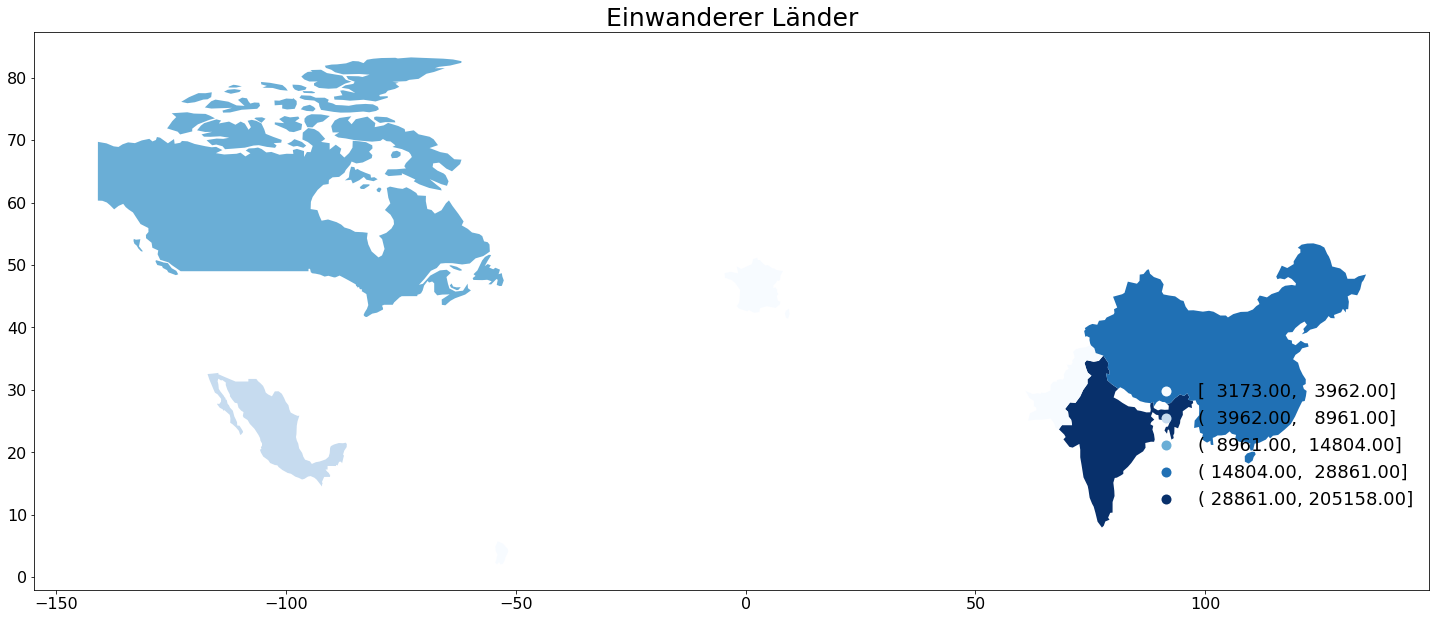

In [150]:
# plot confirmed cases world map
visas_df.plot(column='country_of_citizenship', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Blues',legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.0, .4),
                            fontsize=18,
                            
                            frameon=False))

plt.title('Einwanderer Länder',fontsize=25)


# add countries names and numbers
#for i in range(0,10):
#    plt.text(float(visas_df.longitude[i]),float(visas_df.latitude[i]),"{}\n{}".format(visas_df.index[i],visas_df.country_of_citizenship[i]),size=10)

plt.show()

In [151]:
#https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b